In [1]:
from jaxnn import dataset
from jaxnn import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
from jaxnn import initializers
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

/home/fyang/.conda/envs/mlenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataloader, cls_map = dataset.cat_and_dog_dataloader('train', resize=(200, 200), batch_size=256, valid_ratio=.05)
# dataloader, cls_map = dataset.mnist_dataloader('train', batch_size=256)

In [12]:
initializer = initializers.glorot(type='normal', scaler=1e-2)
model = Model([
    nn.conv2d(n_filter=16, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.conv2d(n_filter=16, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.maxpool2d(window=2, strides=2),
    nn.conv2d(n_filter=32, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.conv2d(n_filter=32, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.maxpool2d(window=2, strides=2),
    nn.conv2d(n_filter=64, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.conv2d(n_filter=64, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.maxpool2d(window=2, strides=2),
    nn.conv2d(n_filter=128, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.conv2d(n_filter=128, kernel_size=3, strides=1, initializer=initializer),
    nn.leaky_relu(),
    nn.maxpool2d(window=2, strides=2),
    nn.flatten(),
    nn.dense(256),
    nn.leaky_relu(),
    nn.dropout(),
    nn.dense(len(cls_map), initializer=initializer),
    nn.softmax()
])
model.fit(dataloader,
          optimizer=optimizers.sgd(1e-1),
          loss_fn=loss.categorical_cross_entropy(from_logits=False),
          epochs=300,
          metrics=['accuracy'])


2022-07-01 14:14:19.788918: E external/org_tensorflow/tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:730] Difference at 0: 2.53549e+06 vs 2.24476e+06
2022-07-01 14:14:19.788936: E external/org_tensorflow/tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:730] Difference at 1: 2.56437e+06 vs 2.26455e+06
2022-07-01 14:14:19.788939: E external/org_tensorflow/tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:730] Difference at 2: 2.54261e+06 vs 2.24747e+06
2022-07-01 14:14:19.788942: E external/org_tensorflow/tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:730] Difference at 3: 2.56679e+06 vs 2.26685e+06
2022-07-01 14:14:19.788944: E external/org_tensorflow/tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:730] Difference at 4: 2.58971e+06 vs 2.28454e+06
2022-07-01 14:14:19.788947: E external/org_tensorflow/tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:730] Difference at 5: 2.56134e+06 vs 2.26236e+06
2022-07-01 14:14:19.788950: E external/o

epoch: [  1\300 -------------------- loss: 0.692 valid loss: 0.693 valid accuracy: 0.517
epoch: [  2\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.517
epoch: [  3\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.517
epoch: [  4\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.517
epoch: [  5\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.517
epoch: [  6\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.515
epoch: [  7\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.517
epoch: [  8\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.517
epoch: [  9\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.495
epoch: [ 10\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.500
epoch: [ 11\300 -------------------- loss: 0.693 valid loss: 0.693 valid accuracy: 0.512
epoch: [ 12\300 -----

KeyboardInterrupt: 

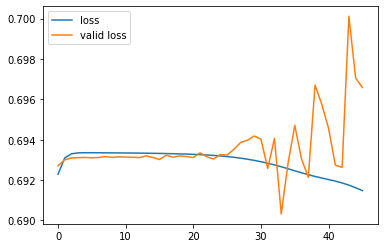

In [13]:
l1, = plt.plot(model.losses)
l2, = plt.plot(model.valid_losses)
plt.legend([l1, l2], ['loss', 'valid loss'])
plt.show()

In [5]:
(train_iter, (x, y)) = next(dataloader)

In [11]:
model.predict(x[:10])

DeviceArray([[1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.],
             [1., 0.]], dtype=float32)

In [7]:
model.predict(x[:2])

DeviceArray([[0.41660568, 0.5833944 ],
             [0.5564766 , 0.4435234 ]], dtype=float32)

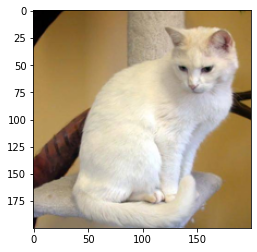

In [8]:
plt.imshow(x[1])